# Correlation

## Load data after handling null

In [21]:
from data_pipeline.open_data_raw_material_price.core import OpenDataRawMaterialPrice
from data_pipeline.open_data_marine_weather.core import OpenDataMarineWeather
from data_pipeline.open_data_terrestrial_weather.core import OpenDataTerrestrialWeather


t = OpenDataTerrestrialWeather(
    date="201908"
)
t_df = t.clean(t.filter(t.input_df))

m = OpenDataMarineWeather(
    date="201908"
)
m_df = m.clean(m.filter(m.input_df))

p = OpenDataRawMaterialPrice(
    date="201908"
)
p_df = p.clean(p.filter(p.input_df))

2020-04-01 20:22:24:manager:<INFO> 1 files is loaded from public_data/open_data_terrestrial_weather/origin/csv/2014-2020.csv in s3 'production-bobsim'
2020-04-01 20:22:24:core:<INFO> Series([], dtype: int64)
2020-04-01 20:22:25:manager:<INFO> 1 files is loaded from public_data/open_data_marine_weather/origin/csv/2014-2020.csv in s3 'production-bobsim'
2020-04-01 20:22:25:core:<INFO> Series([], dtype: int64)
2020-04-01 20:22:33:manager:<INFO> 1 files is loaded from public_data/open_data_raw_material_price/origin/csv/201908.csv in s3 'production-bobsim'
2020-04-01 20:22:33:core:<INFO> no missing value at raw material price


,조사일자,조사지역명,품목명,당일조사가격
0,2019-08-01,강원,감자감자수미수미,238.0
1,2019-08-01,강원,건제품건포도건포도(수입)수입,1450.0
2,2019-08-01,강원,고추붉은고추홍고추일반,990.0
3,2019-08-01,강원,고추풋고추꽈리고추꽈리고추,1050.0
4,2019-08-01,강원,고추풋고추청양청양고추,670.0


## Merge 3 DataFrames into one df

In [22]:
import pandas as pd

w_df = pd.merge(
            t_df, m_df,
            how='inner', on="일시"
        ).reset_index()

w_df.head(10)

,일시,평균기온(°C),최저기온(°C),최고기온(°C),최대 풍속(m/s),평균 풍속(m/s)_x,최소 상대습도(pct),평균 상대습도(pct)_x,강수 계속시간(hr),일강수량(mm),...,평균기압(hPa),평균 상대습도(pct)_y,평균 기온(°C),평균 수온(°C),평균 최대 파고(m),평균 유의 파고(m),최고 유의 파고(m),최고 최대 파고(m),평균 파주기(sec),최고 파주기(sec)
0,2019-08-01,28.048422,24.331579,32.701054,3.921053,1.669474,58.642105,79.241051,4.1000,11.830770,...,1011.594116,91.0625,25.694117,24.729412,0.882353,0.529412,0.735294,1.252941,4.458824,5.547059
1,2019-08-02,28.432978,24.024467,33.870525,3.297895,1.243617,52.852631,77.096809,1.5650,0.720000,...,1011.549988,88.8125,26.382353,25.523529,0.564706,0.335294,0.500000,0.841176,4.535294,7.100000
2,2019-08-03,27.950527,23.901052,33.782104,3.910526,1.288421,54.673683,79.117897,1.0100,3.208333,...,1011.170593,90.6875,26.105883,25.711765,0.629412,0.375000,0.529412,0.929412,5.158823,8.123529
3,2019-08-04,28.063158,23.549475,33.776840,3.334737,1.203158,53.315788,77.867371,1.1725,3.863636,...,1010.593323,88.5000,26.468750,26.006250,0.700000,0.413333,0.558824,1.041176,5.231250,9.011765
4,2019-08-05,28.396843,23.751579,34.145264,3.453684,1.265263,52.536842,76.692635,0.8800,3.430000,...,1010.106262,88.6250,26.406250,26.218750,0.670588,0.400000,0.594118,1.076471,5.058824,7.905882


In [24]:
origin_df = pd.merge(
                p_df, w_df, how="inner", left_on="조사일자", right_on="일시"
            ).drop("일시", axis=1).astype(dtype={"조사일자": "datetime64"})

In [25]:
origin_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 40512 entries, 0 to 40511
Data columns (total 24 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   조사일자            40512 non-null  datetime64[ns]
 1   조사지역명           40512 non-null  object        
 2   품목명             40512 non-null  object        
 3   당일조사가격          40512 non-null  float64       
 4   평균기온(°C)        40512 non-null  float32       
 5   최저기온(°C)        40512 non-null  float32       
 6   최고기온(°C)        40512 non-null  float32       
 7   최대 풍속(m/s)      40512 non-null  float32       
 8   평균 풍속(m/s)_x    40512 non-null  float32       
 9   최소 상대습도(pct)    40512 non-null  float32       
 10  평균 상대습도(pct)_x  40512 non-null  float32       
 11  강수 계속시간(hr)     40512 non-null  float32       
 12  일강수량(mm)        40512 non-null  float32       
 13  평균 풍속(m/s)_y    40512 non-null  float32       
 14  평균기압(hPa)       40512 non-null  float32       
 15  평균

In [26]:
origin_df.describe()

,당일조사가격,평균기온(°C),최저기온(°C),최고기온(°C),최대 풍속(m/s),평균 풍속(m/s)_x,최소 상대습도(pct),평균 상대습도(pct)_x,강수 계속시간(hr),일강수량(mm),...,평균기압(hPa),평균 상대습도(pct)_y,평균 기온(°C),평균 수온(°C),평균 최대 파고(m),평균 유의 파고(m),최고 유의 파고(m),최고 최대 파고(m),평균 파주기(sec),최고 파주기(sec)
count,40512.000000,40512.000000,40512.000000,40512.000000,40512.000000,40512.000000,40512.000000,40512.000000,40512.000000,40512.000000,...,40512.000000,40512.000000,40512.000000,40512.000000,40512.000000,40512.000000,40512.000000,40512.000000,40512.000000,40512.000000
mean,1986.640772,26.024052,22.348356,30.675423,4.011300,1.586215,58.717220,80.291122,3.482316,7.611833,...,1006.944214,85.207024,26.038477,25.957531,1.354981,0.812570,1.122269,1.930990,5.802956,8.219999
std,2562.316177,2.048313,2.001055,2.492165,0.575702,0.358118,7.272638,4.331572,2.538251,8.130293,...,3.995971,4.824147,0.866968,0.455116,0.474614,0.290527,0.375879,0.613369,1.031278,1.497837
min,31.000000,22.217022,18.348936,25.268085,3.297895,1.146809,47.148937,73.802132,0.601000,0.006061,...,996.221436,71.647057,24.023529,24.729412,0.564706,0.335294,0.500000,0.841176,4.458824,5.547059
25%,572.000000,24.441935,20.613979,29.620213,3.453684,1.265263,52.852631,77.164520,1.491111,1.559259,...,1006.329407,83.785713,25.694117,25.623529,1.068750,0.637500,0.847059,1.470588,5.058824,7.100000
50%,1192.000000,26.171276,23.086170,30.641489,3.893617,1.457447,57.659573,78.819359,2.589444,3.430000,...,1007.588257,86.666664,26.333334,26.143749,1.252941,0.758824,1.117647,1.900000,5.587500,7.905882
75%,2233.000000,28.048422,23.974468,32.701054,4.463158,1.822581,61.659573,83.605316,4.585500,11.830770,...,1009.358826,88.625000,26.570587,26.278572,1.580000,0.953333,1.350000,2.287500,6.393750,9.417647
max,24900.000000,28.432978,25.078724,34.145264,5.101064,2.368085,75.500000,90.443619,9.144375,29.143749,...,1012.285706,91.062500,27.100000,26.500000,2.537500,1.562500,2.082353,3.388235,8.042857,11.652942


In [69]:
numeric_df = origin_df.select_dtypes(exclude=['object', 'datetime64[ns]'])
numeric_df.head(5)

,당일조사가격,평균기온(°C),최저기온(°C),최고기온(°C),최대 풍속(m/s),평균 풍속(m/s)_x,최소 상대습도(pct),평균 상대습도(pct)_x,강수 계속시간(hr),일강수량(mm),...,평균기압(hPa),평균 상대습도(pct)_y,평균 기온(°C),평균 수온(°C),평균 최대 파고(m),평균 유의 파고(m),최고 유의 파고(m),최고 최대 파고(m),평균 파주기(sec),최고 파주기(sec)
0,238.0,28.048422,24.331579,32.701054,3.921053,1.669474,58.642105,79.241051,4.1,11.83077,...,1011.594116,91.0625,25.694117,24.729412,0.882353,0.529412,0.735294,1.252941,4.458824,5.547059
1,1450.0,28.048422,24.331579,32.701054,3.921053,1.669474,58.642105,79.241051,4.1,11.83077,...,1011.594116,91.0625,25.694117,24.729412,0.882353,0.529412,0.735294,1.252941,4.458824,5.547059
2,990.0,28.048422,24.331579,32.701054,3.921053,1.669474,58.642105,79.241051,4.1,11.83077,...,1011.594116,91.0625,25.694117,24.729412,0.882353,0.529412,0.735294,1.252941,4.458824,5.547059
3,1050.0,28.048422,24.331579,32.701054,3.921053,1.669474,58.642105,79.241051,4.1,11.83077,...,1011.594116,91.0625,25.694117,24.729412,0.882353,0.529412,0.735294,1.252941,4.458824,5.547059
4,670.0,28.048422,24.331579,32.701054,3.921053,1.669474,58.642105,79.241051,4.1,11.83077,...,1011.594116,91.0625,25.694117,24.729412,0.882353,0.529412,0.735294,1.252941,4.458824,5.547059


## skew

In [71]:
from scipy.stats import skew

def get_skews(df):
    return df.apply(lambda x : skew(x))

skews = get_skews(numeric_df)
skews.reset_index()

,index,0
0,당일조사가격,3.452630
1,평균기온(°C),-0.449521
2,최저기온(°C),-0.560308
3,최고기온(°C),-0.641832
4,최대 풍속(m/s),0.341649
5,평균 풍속(m/s)_x,0.750571
6,최소 상대습도(pct),0.565824
7,평균 상대습도(pct)_x,0.673417
8,강수 계속시간(hr),0.864804
9,일강수량(mm),1.109568


## correlation

In [72]:
# default: method=pearson, min_periods=1
origin_corr = origin_df.corr()
origin_corr

,당일조사가격,평균기온(°C),최저기온(°C),최고기온(°C),최대 풍속(m/s),평균 풍속(m/s)_x,최소 상대습도(pct),평균 상대습도(pct)_x,강수 계속시간(hr),일강수량(mm),...,평균기압(hPa),평균 상대습도(pct)_y,평균 기온(°C),평균 수온(°C),평균 최대 파고(m),평균 유의 파고(m),최고 유의 파고(m),최고 최대 파고(m),평균 파주기(sec),최고 파주기(sec)
당일조사가격,1.000000,0.004224,0.003827,0.004260,0.000887,0.001575,-0.002179,-0.002047,-0.000971,0.000800,...,-0.001827,0.002173,0.005728,0.004594,0.001641,0.001590,0.002362,0.002259,0.002504,0.001566
평균기온(°C),0.004224,1.000000,0.917080,0.953130,0.020307,0.219314,-0.214687,-0.336246,-0.216775,-0.020111,...,-0.225121,0.748279,0.859464,0.289213,-0.116140,-0.116651,-0.043805,-0.064697,-0.047098,-0.043742
최저기온(°C),0.003827,0.917080,1.000000,0.765276,0.181040,0.313786,0.145893,0.008816,0.077529,0.246346,...,-0.409573,0.877907,0.796704,0.253805,0.080749,0.076647,0.181438,0.169231,-0.088418,-0.026087
최고기온(°C),0.004260,0.953130,0.765276,1.000000,-0.082631,0.110975,-0.474565,-0.537910,-0.423264,-0.186918,...,-0.055251,0.567704,0.818471,0.273425,-0.277868,-0.276263,-0.224014,-0.248916,-0.037213,-0.066003
최대 풍속(m/s),0.000887,0.020307,0.181040,-0.082631,1.000000,0.914111,0.194702,0.065473,0.270839,0.361052,...,-0.624432,-0.023524,0.136516,-0.043681,0.569320,0.569585,0.573384,0.581659,-0.136585,-0.153671
평균 풍속(m/s)_x,0.001575,0.219314,0.313786,0.110975,0.914111,1.000000,0.078678,-0.137145,0.187728,0.214715,...,-0.696714,0.064356,0.342552,0.092757,0.626125,0.629529,0.609971,0.605100,-0.082954,-0.178203
최소 상대습도(pct),-0.002179,-0.214687,0.145893,-0.474565,0.194702,0.078678,1.000000,0.927905,0.747128,0.554327,...,-0.391764,0.417136,-0.246801,-0.073009,0.492239,0.479784,0.520868,0.548039,0.107579,0.231472
평균 상대습도(pct)_x,-0.002047,-0.336246,0.008816,-0.537910,0.065473,-0.137145,0.927905,1.000000,0.755948,0.620167,...,-0.206867,0.329055,-0.365689,-0.152193,0.376840,0.360558,0.416328,0.443183,0.172186,0.302437
강수 계속시간(hr),-0.000971,-0.216775,0.077529,-0.423264,0.270839,0.187728,0.747128,0.755948,1.000000,0.871247,...,-0.178331,0.321444,-0.167841,-0.136974,0.500234,0.494389,0.526793,0.539405,0.125613,0.222261
일강수량(mm),0.000800,-0.020111,0.246346,-0.186918,0.361052,0.214715,0.554327,0.620167,0.871247,1.000000,...,-0.105799,0.401890,0.011139,-0.111531,0.300928,0.290059,0.367254,0.380990,-0.079546,0.074180


### correlation btw X and y

In [404]:
corr_target = abs(origin_corr["당일조사가격"].drop("당일조사가격"))
print(corr_target.sum())
corr_target.reset_index()

0.04754771873052942


,index,당일조사가격
0,평균기온(°C),0.004224
1,최저기온(°C),0.003827
2,최고기온(°C),0.004260
3,최대 풍속(m/s),0.000887
4,평균 풍속(m/s)_x,0.001575
5,최소 상대습도(pct),0.002179
6,평균 상대습도(pct)_x,0.002047
7,강수 계속시간(hr),0.000971
8,일강수량(mm),0.000800
9,평균 풍속(m/s)_y,0.000532


### sum of correlation coef

In [75]:
corr_target.drop("당일조사가격").sum()

0.04754771873052942

## Test Each Normalization Method

In [448]:
from sklearn.preprocessing import QuantileTransformer, PowerTransformer ,MinMaxScaler, StandardScaler, RobustScaler, MaxAbsScaler, Normalizer
import numpy as np

def log_transform(df):
    return np.log1p(df)

def sqrt_transform(df):
    return np.sqrt(df)

log = log_transform
sqrt = sqrt_transform
min_max = MinMaxScaler()
standard = StandardScaler()
robust = RobustScaler()
max_abs = MaxAbsScaler()
normal = Normalizer()
quantile = QuantileTransformer()
boxcos = PowerTransformer(method='box-cox')
yeo_johnson = PowerTransformer(method='yeo-johnson')

t_names = ['log', 'sqrt', 'min_max', 'standard', 'robust', 'max_abs', 'normal', 'quantile', 'yeo_johnson', 'None']
transformers = [log, sqrt, min_max, standard, robust, max_abs, normal, quantile, yeo_johnson, None]

In [365]:
import functools
from sklearn.base import BaseEstimator, TransformerMixin

def sum_coef(df):
    # default: method=pearson, min_periods=1
    # method{‘pearson’, ‘kendall’, ‘spearman’} 
    corr = df.corr()
    return abs(corr['당일조사가격'].drop('당일조사가격')).sum()

def analyze_skew(df):
    return get_skews(df)

def analyze_coef(df):
    return sum_coef(df)

def transform(transformer, df):
    if isinstance(transformer, TransformerMixin):
        return pd.DataFrame(transformer.fit_transform(df), columns=df.columns)
    elif transformer is None:
        return df
    else: 
        return transformer(df)

In [366]:
df_list = list(map(functools.partial(transform, df=numeric_df), transformers))

C:\Users\jinho\Anaconda3\envs\BOBSIM\lib\site-packages\scipy\stats\morestats.py:908: RuntimeWarning: overflow encountered in power
  variance = np.var(data**lmb / lmb, axis=0)
C:\Users\jinho\Anaconda3\envs\BOBSIM\lib\site-packages\numpy\core\_methods.py:195: RuntimeWarning: overflow encountered in multiply
  x = um.multiply(x, x, out=x)
C:\Users\jinho\Anaconda3\envs\BOBSIM\lib\site-packages\numpy\core\_methods.py:199: RuntimeWarning: overflow encountered in reduce
  ret = umr_sum(x, axis, dtype, out, keepdims)
C:\Users\jinho\Anaconda3\envs\BOBSIM\lib\site-packages\sklearn\preprocessing\_data.py:2947: RuntimeWarning: overflow encountered in power
  out[pos] = (np.power(x[pos] + 1, lmbda) - 1) / lmbda
C:\Users\jinho\Anaconda3\envs\BOBSIM\lib\site-packages\numpy\core\_methods.py:195: RuntimeWarning: overflow encountered in multiply
  x = um.multiply(x, x, out=x)
C:\Users\jinho\Anaconda3\envs\BOBSIM\lib\site-packages\numpy\core\_methods.py:199: RuntimeWarning: overflow encountered in reduc

### skew

In [367]:
skew_df = pd.concat(list(map(analyze_skew, df_list)), axis=1)
skew_df.columns = t_names
skew_df
# pd.DataFrame(list(map(analyze_skew, df_list)), columns=transformers)

,log,sqrt,min_max,standard,robust,max_abs,normal,quantile,boxcos,yeo_johnson,None
당일조사가격,0.035898,1.641829,3.452630,3.452630,3.452630,3.452630,-0.640582,-0.000023,-0.000236,-0.000245,3.452630
평균기온(°C),-0.526854,-0.489448,-0.449521,-0.449521,-0.449521,-0.449521,-0.245177,0.001429,-0.180034,-0.179053,-0.449521
최저기온(°C),-0.647586,-0.605521,-0.560308,-0.560308,-0.560308,-0.560308,-0.221075,-0.000011,-0.224405,-0.222880,-0.560308
최고기온(°C),-0.798956,-0.722585,-0.641832,-0.641832,-0.641832,-0.641832,-0.242932,0.001013,-0.120122,-0.119275,-0.641832
최대 풍속(m/s),0.219769,0.265153,0.341649,0.341649,0.341649,0.341649,-0.032768,-0.000962,0.058644,0.067316,0.341649
평균 풍속(m/s)_x,0.573057,0.608093,0.750571,0.750571,0.750571,0.750571,0.336855,-0.000022,0.118598,0.146442,0.750571
최소 상대습도(pct),0.326875,0.444296,0.565824,0.565824,0.565824,0.565824,-0.105109,0.000824,0.033605,0.034069,0.565824
평균 상대습도(pct)_x,0.589898,0.630985,0.673417,0.673417,0.673417,0.673417,-0.293213,-0.000575,0.105321,0.103891,0.673417
강수 계속시간(hr),0.158044,0.378678,0.864804,0.864804,0.864804,0.864804,1.401134,-0.000490,-0.026950,0.042207,0.864804
일강수량(mm),0.046660,0.416607,1.109568,1.109568,1.109568,1.109568,1.678683,0.000781,-0.146122,0.012724,1.109568


### sum of coef

In [368]:
pd.DataFrame(list(map(analyze_coef, df_list)), index=t_names, columns=['sum of coef'])

,sum of coef
log,0.047510
sqrt,0.036592
min_max,0.047548
standard,0.047548
robust,0.047548
max_abs,0.047548
normal,16.012792
quantile,0.058656
boxcos,0.050537
yeo_johnson,0.050254


## Grid Search

In [369]:
numeric_df.head(5)

,당일조사가격,평균기온(°C),최저기온(°C),최고기온(°C),최대 풍속(m/s),평균 풍속(m/s)_x,최소 상대습도(pct),평균 상대습도(pct)_x,강수 계속시간(hr),일강수량(mm),...,평균기압(hPa),평균 상대습도(pct)_y,평균 기온(°C),평균 수온(°C),평균 최대 파고(m),평균 유의 파고(m),최고 유의 파고(m),최고 최대 파고(m),평균 파주기(sec),최고 파주기(sec)
0,238.0,28.048422,24.331579,32.701054,3.921053,1.669474,58.642105,79.241051,4.1,11.83077,...,1011.594116,91.0625,25.694117,24.729412,0.882353,0.529412,0.735294,1.252941,4.458824,5.547059
1,1450.0,28.048422,24.331579,32.701054,3.921053,1.669474,58.642105,79.241051,4.1,11.83077,...,1011.594116,91.0625,25.694117,24.729412,0.882353,0.529412,0.735294,1.252941,4.458824,5.547059
2,990.0,28.048422,24.331579,32.701054,3.921053,1.669474,58.642105,79.241051,4.1,11.83077,...,1011.594116,91.0625,25.694117,24.729412,0.882353,0.529412,0.735294,1.252941,4.458824,5.547059
3,1050.0,28.048422,24.331579,32.701054,3.921053,1.669474,58.642105,79.241051,4.1,11.83077,...,1011.594116,91.0625,25.694117,24.729412,0.882353,0.529412,0.735294,1.252941,4.458824,5.547059
4,670.0,28.048422,24.331579,32.701054,3.921053,1.669474,58.642105,79.241051,4.1,11.83077,...,1011.594116,91.0625,25.694117,24.729412,0.882353,0.529412,0.735294,1.252941,4.458824,5.547059


### normalize y

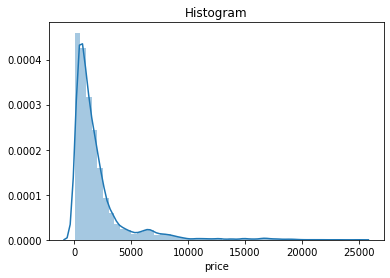

In [370]:
import matplotlib.pyplot as plt
import seaborn as sns

def graphize(series, name="Histogram"):
    plt.title(name)
    sns.distplot(series)
    return None

y = numeric_df['당일조사가격'].rename('price')
graphize(y)

In [371]:
l_ty = list(map(functools.partial(transform, df=pd.DataFrame(y)), transformers))

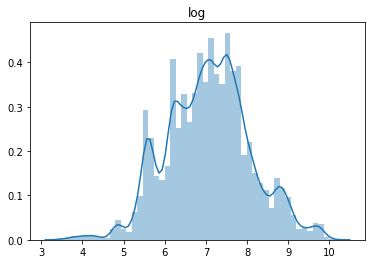

In [372]:
graphize(l_ty[0], name=t_names[0])

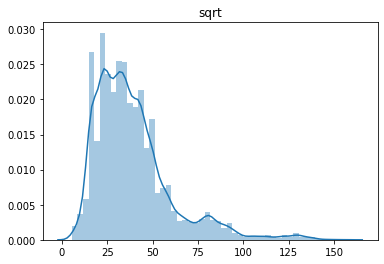

In [373]:
graphize(l_ty[1], name=t_names[1])

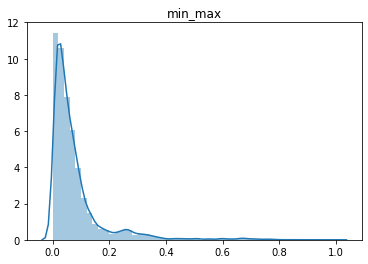

In [374]:
graphize(l_ty[2], name=t_names[2])

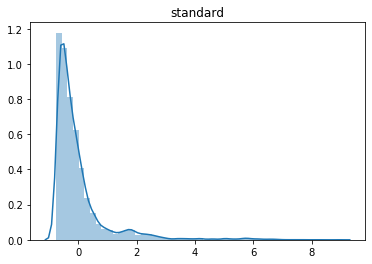

In [375]:
graphize(l_ty[3], name=t_names[3])

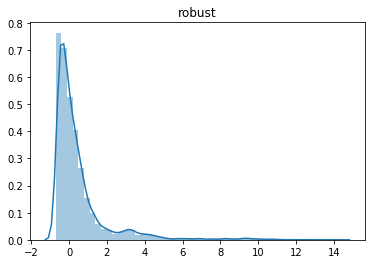

In [376]:
graphize(l_ty[4], name=t_names[4])

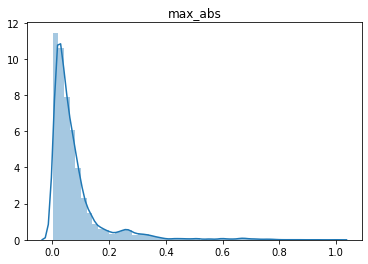

In [377]:
graphize(l_ty[5], name=t_names[5])

C:\Users\jinho\Anaconda3\envs\BOBSIM\lib\site-packages\seaborn\distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)


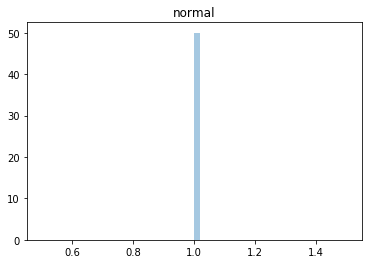

In [407]:
graphize(l_ty[6], name=t_names[6])

In [378]:
X = numeric_df.drop("당일조사가격" ,axis=1)

In [443]:
"""
    First iterate y, and then iterate X
"""

def corr_xy(x, y):
    corr = pd.concat([x,y] ,axis=1).corr()
    return abs(corr['price']).drop('price').sum()

def search_transformers(column, X, y):
    """
        iterate transformer for X and compare with y (corr_xy)
    """
    x = X[column]
    l_tx = list(map(functools.partial(transform, df=pd.DataFrame(x)), transformers))

    def func(x):
        return corr_xy(x, y)
    
    l_coef = list(map(func, l_tx))
 
    # find max coef and index 
    max_coef = max(l_coef)
    max_index = l_coef.index(max_coef)
    
    proper_transformer = t_names[max_index]
    return proper_transformer, max_coef

                
def grid_search(y, X):
    # iterate X
    return list(map(functools.partial(search_transformers, X=X, y=y), X.columns.tolist()))
   
# iterate y
result = list(map(functools.partial(grid_search, X=X), l_ty))

C:\Users\jinho\Anaconda3\envs\BOBSIM\lib\site-packages\sklearn\preprocessing\_data.py:2982: RuntimeWarning: divide by zero encountered in log
  loglike = -n_samples / 2 * np.log(x_trans.var())
C:\Users\jinho\Anaconda3\envs\BOBSIM\lib\site-packages\sklearn\preprocessing\_data.py:2982: RuntimeWarning: divide by zero encountered in log
  loglike = -n_samples / 2 * np.log(x_trans.var())
C:\Users\jinho\Anaconda3\envs\BOBSIM\lib\site-packages\numpy\core\_methods.py:195: RuntimeWarning: overflow encountered in multiply
  x = um.multiply(x, x, out=x)
C:\Users\jinho\Anaconda3\envs\BOBSIM\lib\site-packages\numpy\core\_methods.py:199: RuntimeWarning: overflow encountered in reduce
  ret = umr_sum(x, axis, dtype, out, keepdims)
C:\Users\jinho\Anaconda3\envs\BOBSIM\lib\site-packages\numpy\core\_methods.py:195: RuntimeWarning: overflow encountered in multiply
  x = um.multiply(x, x, out=x)
C:\Users\jinho\Anaconda3\envs\BOBSIM\lib\site-packages\numpy\core\_methods.py:199: RuntimeWarning: overflow enc

C:\Users\jinho\Anaconda3\envs\BOBSIM\lib\site-packages\sklearn\preprocessing\_data.py:2982: RuntimeWarning: divide by zero encountered in log
  loglike = -n_samples / 2 * np.log(x_trans.var())
C:\Users\jinho\Anaconda3\envs\BOBSIM\lib\site-packages\sklearn\preprocessing\_data.py:2982: RuntimeWarning: divide by zero encountered in log
  loglike = -n_samples / 2 * np.log(x_trans.var())
C:\Users\jinho\Anaconda3\envs\BOBSIM\lib\site-packages\numpy\core\_methods.py:195: RuntimeWarning: overflow encountered in multiply
  x = um.multiply(x, x, out=x)
C:\Users\jinho\Anaconda3\envs\BOBSIM\lib\site-packages\numpy\core\_methods.py:199: RuntimeWarning: overflow encountered in reduce
  ret = umr_sum(x, axis, dtype, out, keepdims)
C:\Users\jinho\Anaconda3\envs\BOBSIM\lib\site-packages\numpy\core\_methods.py:195: RuntimeWarning: overflow encountered in multiply
  x = um.multiply(x, x, out=x)
C:\Users\jinho\Anaconda3\envs\BOBSIM\lib\site-packages\numpy\core\_methods.py:199: RuntimeWarning: overflow enc

C:\Users\jinho\Anaconda3\envs\BOBSIM\lib\site-packages\sklearn\preprocessing\_data.py:2982: RuntimeWarning: divide by zero encountered in log
  loglike = -n_samples / 2 * np.log(x_trans.var())
C:\Users\jinho\Anaconda3\envs\BOBSIM\lib\site-packages\sklearn\preprocessing\_data.py:2982: RuntimeWarning: divide by zero encountered in log
  loglike = -n_samples / 2 * np.log(x_trans.var())
C:\Users\jinho\Anaconda3\envs\BOBSIM\lib\site-packages\numpy\core\_methods.py:195: RuntimeWarning: overflow encountered in multiply
  x = um.multiply(x, x, out=x)
C:\Users\jinho\Anaconda3\envs\BOBSIM\lib\site-packages\numpy\core\_methods.py:199: RuntimeWarning: overflow encountered in reduce
  ret = umr_sum(x, axis, dtype, out, keepdims)
C:\Users\jinho\Anaconda3\envs\BOBSIM\lib\site-packages\numpy\core\_methods.py:195: RuntimeWarning: overflow encountered in multiply
  x = um.multiply(x, x, out=x)
C:\Users\jinho\Anaconda3\envs\BOBSIM\lib\site-packages\numpy\core\_methods.py:199: RuntimeWarning: overflow enc

C:\Users\jinho\Anaconda3\envs\BOBSIM\lib\site-packages\sklearn\preprocessing\_data.py:2982: RuntimeWarning: divide by zero encountered in log
  loglike = -n_samples / 2 * np.log(x_trans.var())
C:\Users\jinho\Anaconda3\envs\BOBSIM\lib\site-packages\sklearn\preprocessing\_data.py:2982: RuntimeWarning: divide by zero encountered in log
  loglike = -n_samples / 2 * np.log(x_trans.var())
C:\Users\jinho\Anaconda3\envs\BOBSIM\lib\site-packages\numpy\core\_methods.py:195: RuntimeWarning: overflow encountered in multiply
  x = um.multiply(x, x, out=x)
C:\Users\jinho\Anaconda3\envs\BOBSIM\lib\site-packages\numpy\core\_methods.py:199: RuntimeWarning: overflow encountered in reduce
  ret = umr_sum(x, axis, dtype, out, keepdims)
C:\Users\jinho\Anaconda3\envs\BOBSIM\lib\site-packages\numpy\core\_methods.py:195: RuntimeWarning: overflow encountered in multiply
  x = um.multiply(x, x, out=x)
C:\Users\jinho\Anaconda3\envs\BOBSIM\lib\site-packages\numpy\core\_methods.py:199: RuntimeWarning: overflow enc

In [410]:
result_df = pd.DataFrame(result, columns=X.columns, index=t_names)
result_df

,평균기온(°C),최저기온(°C),최고기온(°C),최대 풍속(m/s),평균 풍속(m/s)_x,최소 상대습도(pct),평균 상대습도(pct)_x,강수 계속시간(hr),일강수량(mm),평균 풍속(m/s)_y,평균기압(hPa),평균 상대습도(pct)_y,평균 기온(°C),평균 수온(°C),평균 최대 파고(m),평균 유의 파고(m),최고 유의 파고(m),최고 최대 파고(m),평균 파주기(sec),최고 파주기(sec)
log,"(quantile, 0.002746868219911344)","(quantile, 0.002164941094224643)","(quantile, 0.0029785252139653585)","(quantile, 0.0006788511333647689)","(boxcos, 0.0005585500005455258)","(quantile, 0.0005508649332104334)","(min_max, 0.0010829658531626278)","(boxcos, 0.0010090562818121896)","(quantile, 0.001168669084179999)","(log, 0.0023960406806111576)","(quantile, 0.0024586880218782454)","(quantile, 0.003039279584607099)","(quantile, 0.0016699048004822552)","(log, 0.0045762053680702365)","(quantile, 0.004600908364629918)","(quantile, 0.00456949111516934)","(quantile, 0.004809239223879724)","(quantile, 0.0046052747445291505)","(boxcos, 0.005036641942013966)","(boxcos, 0.004593353975860025)"
sqrt,"(log, 0.001338190775378134)","(boxcos, 0.001373400658635128)","(log, 0.001503186888953695)","(quantile, 0.0008166439426507631)","(max_abs, 0.0004681972073146701)","(min_max, 0.0011461323969837887)","(max_abs, 0.00043646658754240415)","(boxcos, 0.0013749033477618478)","(standard, 0.0011094114571533066)","(log, 0.0012125498553228985)","(quantile, 0.002495343425273903)","(log, 0.00028585097397211995)","(quantile, 0.0039515534918430325)","(log, 0.004351235328486065)","(quantile, 0.003430329239377231)","(quantile, 0.0032477763643901955)","(quantile, 0.0035991263954315827)","(quantile, 0.0034473178077152546)","(min_max, 0.003693674703116909)","(boxcos, 0.003273408799769479)"
min_max,"(log, 0.00430774013106183)","(boxcos, 0.0038597073140120087)","(log, 0.004385821131826701)","(quantile, 0.0009585812831015703)","(sqrt, 0.0015766004697222965)","(min_max, 0.002178531039914264)","(None, 0.002046706467994077)","(boxcos, 0.0016725513701182587)","(standard, 0.0008003345968124098)","(quantile, 0.0006120181661436853)","(quantile, 0.0025020402555227)","(robust, 0.0021729019340408617)","(quantile, 0.005802358488076425)","(yeo_johnson, 0.004611273796582136)","(quantile, 0.0023321014781008892)","(quantile, 0.002041690759492252)","(quantile, 0.0024314681959399453)","(quantile, 0.0023348075880593195)","(min_max, 0.0025044986313449147)","(yeo_johnson, 0.0018541609886097692)"
standard,"(log, 0.004307740131061743)","(boxcos, 0.003859707314011977)","(log, 0.004385821131826689)","(quantile, 0.0009585812831015229)","(sqrt, 0.0015766004697223013)","(min_max, 0.002178531039914256)","(None, 0.002046706467994048)","(boxcos, 0.0016725513701182251)","(standard, 0.0008003345968124204)","(quantile, 0.000612018166143675)","(quantile, 0.0025020402555227033)","(robust, 0.0021729019340408465)","(quantile, 0.005802358488076313)","(yeo_johnson, 0.0046112737965821535)","(quantile, 0.0023321014781008775)","(quantile, 0.0020416907594922947)","(quantile, 0.00243146819593992)","(quantile, 0.0023348075880593516)","(min_max, 0.0025044986313449403)","(yeo_johnson, 0.0018541609886096844)"
robust,"(log, 0.0043077401310617144)","(boxcos, 0.0038597073140119917)","(log, 0.0043858211318265955)","(quantile, 0.0009585812831015188)","(sqrt, 0.0015766004697222596)","(min_max, 0.0021785310399142365)","(None, 0.0020467064679940148)","(boxcos, 0.0016725513701182195)","(standard, 0.0008003345968123981)","(quantile, 0.0006120181661437016)","(quantile, 0.0025020402555226717)","(robust, 0.002172901934040822)","(quantile, 0.005802358488076277)","(yeo_johnson, 0.00461127379658212)","(quantile, 0.002332101478100771)","(quantile, 0.0020416907594922634)","(quantile, 0.0024314681959399123)","(quantile, 0.0023348075880593355)","(min_max, 0.0025044986313448826)","(yeo_johnson, 0.0018541609886096669)"
max_abs,"(log, 0.004307740131061776)","(boxcos, 0.0038597073140119236)","(log, 0.004385821131826632)","(quantile, 0.0009585812831015468)","(sqrt, 0.001576600469722288)","(min_max, 0.002178531039914243)","(None, 0.002046706467994019)","(boxcos, 0.0016725513701182247)","(standard, 0.000800334

In [421]:
sum_df = pd.DataFrame(np.array(result_df.values.tolist())[:, :, 1], result_df.index, result_df.columns).astype("float").sum(axis=1).rename("sum")
sum_df

log            0.055294
sqrt           0.042555
min_max        0.050986
standard       0.050986
robust         0.050986
max_abs        0.050986
normal         0.000000
quantile       0.064474
boxcos         0.055874
yeo_johnson    0.055803
None           0.050986
Name: sum, dtype: float64

In [422]:
transformer_df = pd.DataFrame(np.array(result_df.values.tolist())[:, :, 0], result_df.index, result_df.columns)
transformer_df

,평균기온(°C),최저기온(°C),최고기온(°C),최대 풍속(m/s),평균 풍속(m/s)_x,최소 상대습도(pct),평균 상대습도(pct)_x,강수 계속시간(hr),일강수량(mm),평균 풍속(m/s)_y,평균기압(hPa),평균 상대습도(pct)_y,평균 기온(°C),평균 수온(°C),평균 최대 파고(m),평균 유의 파고(m),최고 유의 파고(m),최고 최대 파고(m),평균 파주기(sec),최고 파주기(sec)
log,quantile,quantile,quantile,quantile,boxcos,quantile,min_max,boxcos,quantile,log,quantile,quantile,quantile,log,quantile,quantile,quantile,quantile,boxcos,boxcos
sqrt,log,boxcos,log,quantile,max_abs,min_max,max_abs,boxcos,standard,log,quantile,log,quantile,log,quantile,quantile,quantile,quantile,min_max,boxcos
min_max,log,boxcos,log,quantile,sqrt,min_max,None,boxcos,standard,quantile,quantile,robust,quantile,yeo_johnson,quantile,quantile,quantile,quantile,min_max,yeo_johnson
standard,log,boxcos,log,quantile,sqrt,min_max,None,boxcos,standard,quantile,quantile,robust,quantile,yeo_johnson,quantile,quantile,quantile,quantile,min_max,yeo_johnson
robust,log,boxcos,log,quantile,sqrt,min_max,None,boxcos,standard,quantile,quantile,robust,quantile,yeo_johnson,quantile,quantile,quantile,quantile,min_max,yeo_johnson
max_abs,log,boxcos,log,quantile,sqrt,min_max,None,boxcos,standard,quantile,quantile,robust,quantile,yeo_johnson,quantile,quantile,quantile,quantile,min_max,yeo_johnson
normal,log,log,log,log,log,log,log,log,log,log,log,log,log,log,log,log,log,log,log,log
quantile,quantile,log,quantile,quantile,boxcos,standard,min_max,boxcos,standard,log,quantile,boxcos,log,log,quantile,quantile,quantile,quantile,boxcos,boxcos
boxcos,quantile,quantile,quantile,quantile,boxcos,quantile,min_max,boxcos,quantile,log,quantile,quantile,quantile,log,quantile,quantile,quantile,quantile,boxcos,boxcos
yeo_johnson,quantile,quantile,quantile,quantile,boxcos,quantile,min_max,boxcos,quantile,log,quantile,quantile,quantile,log,quantile,quantile,quantile,quantile,boxcos,boxcos


In [423]:
final_df = pd.concat([sum_df, transformer_df], axis=1)
final_df

,sum,평균기온(°C),최저기온(°C),최고기온(°C),최대 풍속(m/s),평균 풍속(m/s)_x,최소 상대습도(pct),평균 상대습도(pct)_x,강수 계속시간(hr),일강수량(mm),...,평균기압(hPa),평균 상대습도(pct)_y,평균 기온(°C),평균 수온(°C),평균 최대 파고(m),평균 유의 파고(m),최고 유의 파고(m),최고 최대 파고(m),평균 파주기(sec),최고 파주기(sec)
log,0.055294,quantile,quantile,quantile,quantile,boxcos,quantile,min_max,boxcos,quantile,...,quantile,quantile,quantile,log,quantile,quantile,quantile,quantile,boxcos,boxcos
sqrt,0.042555,log,boxcos,log,quantile,max_abs,min_max,max_abs,boxcos,standard,...,quantile,log,quantile,log,quantile,quantile,quantile,quantile,min_max,boxcos
min_max,0.050986,log,boxcos,log,quantile,sqrt,min_max,None,boxcos,standard,...,quantile,robust,quantile,yeo_johnson,quantile,quantile,quantile,quantile,min_max,yeo_johnson
standard,0.050986,log,boxcos,log,quantile,sqrt,min_max,None,boxcos,standard,...,quantile,robust,quantile,yeo_johnson,quantile,quantile,quantile,quantile,min_max,yeo_johnson
robust,0.050986,log,boxcos,log,quantile,sqrt,min_max,None,boxcos,standard,...,quantile,robust,quantile,yeo_johnson,quantile,quantile,quantile,quantile,min_max,yeo_johnson
max_abs,0.050986,log,boxcos,log,quantile,sqrt,min_max,None,boxcos,standard,...,quantile,robust,quantile,yeo_johnson,quantile,quantile,quantile,quantile,min_max,yeo_johnson
normal,0.000000,log,log,log,log,log,log,log,log,log,...,log,log,log,log,log,log,log,log,log,log
quantile,0.064474,quantile,log,quantile,quantile,boxcos,standard,min_max,boxcos,standard,...,quantile,boxcos,log,log,quantile,quantile,quantile,quantile,boxcos,boxcos
boxcos,0.055874,quantile,quantile,quantile,quantile,boxcos,quantile,min_max,boxcos,quantile,...,quantile,quantile,quantile,log,quantile,quantile,quantile,quantile,boxcos,boxcos
yeo_johnson,0.055803,quantile,quantile,quantile,quantile,boxcos,quantile,min_max,boxcos,quantile,...,quantile,quantile,quantile,log,quantile,quantile,quantile,quantile,boxcos,boxcos


In [434]:
final_row = final_df.filter(like="quantile", axis=0)
final_row

,sum,평균기온(°C),최저기온(°C),최고기온(°C),최대 풍속(m/s),평균 풍속(m/s)_x,최소 상대습도(pct),평균 상대습도(pct)_x,강수 계속시간(hr),일강수량(mm),...,평균기압(hPa),평균 상대습도(pct)_y,평균 기온(°C),평균 수온(°C),평균 최대 파고(m),평균 유의 파고(m),최고 유의 파고(m),최고 최대 파고(m),평균 파주기(sec),최고 파주기(sec)
quantile,0.064474,quantile,log,quantile,quantile,boxcos,standard,min_max,boxcos,standard,...,quantile,boxcos,log,log,quantile,quantile,quantile,quantile,boxcos,boxcos


In [438]:
t = OpenDataTerrestrialWeather(
    date="201907"
)
t_df7 = t.clean(t.filter(t.input_df))

m = OpenDataMarineWeather(
    date="201907"
)
m_df7 = m.clean(m.filter(m.input_df))

p = OpenDataRawMaterialPrice(
    date="201907"
)
p_df7 = p.clean(p.filter(p.input_df))

import pandas as pd

w_df7 = pd.merge(
            t_df7, m_df7,
            how='inner', on="일시"
        )
origin_df7 = pd.merge(
                p_df7, w_df7, how="inner", left_on="조사일자", right_on="일시"
            ).drop("일시", axis=1).astype(dtype={"조사일자": "datetime64"})

2020-04-02 01:05:30:manager:<INFO> 1 files is loaded from public_data/open_data_terrestrial_weather/origin/csv/2014-2020.csv in s3 'production-bobsim'
2020-04-02 01:05:31:core:<INFO> 강수 계속시간(hr)    1
dtype: int64
2020-04-02 01:05:32:manager:<INFO> 1 files is loaded from public_data/open_data_marine_weather/origin/csv/2014-2020.csv in s3 'production-bobsim'
2020-04-02 01:05:32:core:<INFO> Series([], dtype: int64)
2020-04-02 01:05:35:manager:<INFO> 1 files is loaded from public_data/open_data_raw_material_price/origin/csv/201907.csv in s3 'production-bobsim'
2020-04-02 01:05:35:core:<INFO> no missing value at raw material price


In [446]:
numeric_df7 = origin_df7.select_dtypes(exclude=['object', 'datetime64[ns]'])

In [449]:
X7 = numeric_df7.drop("당일조사가격" ,axis=1)
y7 = numeric_df7["당일조사가격"].rename('price')
l_ty7 = list(map(functools.partial(transform, df=pd.DataFrame(y7)), transformers))
result7 = list(map(functools.partial(grid_search, X=X7), l_ty7))

C:\Users\jinho\Anaconda3\envs\BOBSIM\lib\site-packages\numpy\core\_methods.py:195: RuntimeWarning: overflow encountered in multiply
  x = um.multiply(x, x, out=x)
C:\Users\jinho\Anaconda3\envs\BOBSIM\lib\site-packages\numpy\core\_methods.py:199: RuntimeWarning: overflow encountered in reduce
  ret = umr_sum(x, axis, dtype, out, keepdims)
C:\Users\jinho\Anaconda3\envs\BOBSIM\lib\site-packages\numpy\core\_methods.py:195: RuntimeWarning: overflow encountered in multiply
  x = um.multiply(x, x, out=x)
C:\Users\jinho\Anaconda3\envs\BOBSIM\lib\site-packages\numpy\core\_methods.py:199: RuntimeWarning: overflow encountered in reduce
  ret = umr_sum(x, axis, dtype, out, keepdims)
C:\Users\jinho\Anaconda3\envs\BOBSIM\lib\site-packages\numpy\core\_methods.py:195: RuntimeWarning: overflow encountered in multiply
  x = um.multiply(x, x, out=x)
C:\Users\jinho\Anaconda3\envs\BOBSIM\lib\site-packages\numpy\core\_methods.py:199: RuntimeWarning: overflow encountered in reduce
  ret = umr_sum(x, axis, dt

In [454]:
result_df7 = pd.DataFrame(result7, columns=X7.columns, index=t_names)
sum_df7 = pd.DataFrame(np.array(result_df7.values.tolist())[:, :, 1], result_df7.index, result_df7.columns).astype("float").sum(axis=1).rename("sum")
sum_df7

log            0.075764
sqrt           0.071560
min_max        0.071648
standard       0.071648
robust         0.071648
max_abs        0.071648
normal         0.000000
quantile       0.065776
yeo_johnson    0.075759
None           0.071648
Name: sum, dtype: float64

# Build Pipeline

In [470]:
from data_pipeline.open_data_raw_material_price.core import OpenDataRawMaterialPrice
from data_pipeline.open_data_marine_weather.core import OpenDataMarineWeather
from data_pipeline.open_data_terrestrial_weather.core import OpenDataTerrestrialWeather
import pandas as pd

def build_dataset(date="201908"):
    t = OpenDataTerrestrialWeather(
        date=date
    )
    t_df = t.clean(t.filter(t.input_df))

    m = OpenDataMarineWeather(
        date=date
    )
    m_df = m.clean(m.filter(m.input_df))

    p = OpenDataRawMaterialPrice(
        date=date
    )
    p_df = p.clean(p.filter(p.input_df))


    w_df = pd.merge(
                t_df, m_df,
                how='inner', on="일시"
            ).reset_index()

    w_df.head(10)
    
    origin_df = pd.merge(
                    p_df, w_df, how="inner", left_on="조사일자", right_on="일시"
                ).drop("일시", axis=1).astype(dtype={"조사일자": "datetime64"})
    
    return origin_df.select_dtypes(exclude=['object', 'datetime64[ns]'])

def split_xy(df):
    X = df.drop("당일조사가격" ,axis=1)
    y = df['당일조사가격'].rename('price')
    return X, y


def get_result_df(X, y):
    l_ty = list(map(functools.partial(transform, df=pd.DataFrame(y)), transformers))
    result = list(map(functools.partial(grid_search, X=X), l_ty))
    return pd.DataFrame(result, columns=X.columns, index=t_names)

def get_final_df(df):
    sum_df = pd.DataFrame(np.array(df.values.tolist())[:, :, 1], df.index, df.columns).astype("float").sum(axis=1).rename("sum")
    transformer_df = pd.DataFrame(np.array(df.values.tolist())[:, :, 0], df.index, df.columns)
    return pd.concat([sum_df, transformer_df], axis=1)

def get_origin_corr_sum(df):
    origin_corr = df.corr()
    corr_target = abs(origin_corr["당일조사가격"].drop("당일조사가격"))
    return corr_target.sum()

def pipeline(date="201908"):
    numeric_df = build_dataset(date=date)
    X, y = split_xy(numeric_df)
    result_df = get_result_df(X, y)
    return get_final_df(result_df), get_origin_corr_sum(numeric_df)

In [471]:
final08, origin08 = pipeline("201908")

2020-04-02 01:36:29:manager:<INFO> 1 files is loaded from public_data/open_data_terrestrial_weather/origin/csv/2014-2020.csv in s3 'production-bobsim'
2020-04-02 01:36:29:core:<INFO> Series([], dtype: int64)
2020-04-02 01:36:30:manager:<INFO> 1 files is loaded from public_data/open_data_marine_weather/origin/csv/2014-2020.csv in s3 'production-bobsim'
2020-04-02 01:36:30:core:<INFO> Series([], dtype: int64)
2020-04-02 01:36:33:manager:<INFO> 1 files is loaded from public_data/open_data_raw_material_price/origin/csv/201908.csv in s3 'production-bobsim'
2020-04-02 01:36:33:core:<INFO> no missing value at raw material price
C:\Users\jinho\Anaconda3\envs\BOBSIM\lib\site-packages\sklearn\preprocessing\_data.py:2982: RuntimeWarning: divide by zero encountered in log
  loglike = -n_samples / 2 * np.log(x_trans.var())
C:\Users\jinho\Anaconda3\envs\BOBSIM\lib\site-packages\sklearn\preprocessing\_data.py:2982: RuntimeWarning: divide by zero encountered in log
  loglike = -n_samples / 2 * np.log(

C:\Users\jinho\Anaconda3\envs\BOBSIM\lib\site-packages\sklearn\preprocessing\_data.py:2982: RuntimeWarning: divide by zero encountered in log
  loglike = -n_samples / 2 * np.log(x_trans.var())
C:\Users\jinho\Anaconda3\envs\BOBSIM\lib\site-packages\sklearn\preprocessing\_data.py:2982: RuntimeWarning: divide by zero encountered in log
  loglike = -n_samples / 2 * np.log(x_trans.var())
C:\Users\jinho\Anaconda3\envs\BOBSIM\lib\site-packages\numpy\core\_methods.py:195: RuntimeWarning: overflow encountered in multiply
  x = um.multiply(x, x, out=x)
C:\Users\jinho\Anaconda3\envs\BOBSIM\lib\site-packages\numpy\core\_methods.py:199: RuntimeWarning: overflow encountered in reduce
  ret = umr_sum(x, axis, dtype, out, keepdims)
C:\Users\jinho\Anaconda3\envs\BOBSIM\lib\site-packages\numpy\core\_methods.py:199: RuntimeWarning: overflow encountered in reduce
  ret = umr_sum(x, axis, dtype, out, keepdims)
C:\Users\jinho\Anaconda3\envs\BOBSIM\lib\site-packages\numpy\core\_methods.py:195: RuntimeWarning

In [477]:
print(origin08)
final08

0.049929477326271836


,sum,index,평균기온(°C),최저기온(°C),최고기온(°C),최대 풍속(m/s),평균 풍속(m/s)_x,최소 상대습도(pct),평균 상대습도(pct)_x,강수 계속시간(hr),...,평균기압(hPa),평균 상대습도(pct)_y,평균 기온(°C),평균 수온(°C),평균 최대 파고(m),평균 유의 파고(m),최고 유의 파고(m),최고 최대 파고(m),평균 파주기(sec),최고 파주기(sec)
log,0.061548,log,quantile,quantile,quantile,quantile,yeo_johnson,quantile,min_max,yeo_johnson,...,quantile,quantile,quantile,log,quantile,quantile,quantile,quantile,yeo_johnson,yeo_johnson
sqrt,0.046459,normal,log,yeo_johnson,log,quantile,max_abs,min_max,max_abs,yeo_johnson,...,quantile,log,quantile,log,quantile,quantile,quantile,quantile,min_max,yeo_johnson
min_max,0.053427,normal,log,yeo_johnson,log,quantile,sqrt,min_max,None,yeo_johnson,...,quantile,robust,quantile,yeo_johnson,quantile,quantile,quantile,quantile,min_max,yeo_johnson
standard,0.053427,normal,log,yeo_johnson,log,quantile,sqrt,min_max,None,yeo_johnson,...,quantile,robust,quantile,yeo_johnson,quantile,quantile,quantile,quantile,min_max,yeo_johnson
robust,0.053427,normal,log,yeo_johnson,log,quantile,sqrt,min_max,None,yeo_johnson,...,quantile,robust,quantile,yeo_johnson,quantile,quantile,quantile,quantile,min_max,yeo_johnson
max_abs,0.053427,normal,log,yeo_johnson,log,quantile,sqrt,min_max,None,yeo_johnson,...,quantile,robust,quantile,yeo_johnson,quantile,quantile,quantile,quantile,min_max,yeo_johnson
normal,0.000000,log,log,log,log,log,log,log,log,log,...,log,log,log,log,log,log,log,log,log,log
quantile,0.071694,log,quantile,log,quantile,quantile,yeo_johnson,standard,min_max,yeo_johnson,...,quantile,yeo_johnson,log,log,quantile,quantile,quantile,quantile,yeo_johnson,yeo_johnson
yeo_johnson,0.062148,log,quantile,quantile,quantile,quantile,yeo_johnson,quantile,min_max,yeo_johnson,...,quantile,quantile,quantile,log,quantile,quantile,quantile,quantile,yeo_johnson,yeo_johnson
None,0.053427,normal,log,yeo_johnson,log,quantile,sqrt,min_max,None,yeo_johnson,...,quantile,robust,quantile,yeo_johnson,quantile,quantile,quantile,quantile,min_max,yeo_johnson


In [474]:
final07, origin7 = pipeline("201907")

2020-04-02 01:37:32:manager:<INFO> 1 files is loaded from public_data/open_data_terrestrial_weather/origin/csv/2014-2020.csv in s3 'production-bobsim'
2020-04-02 01:37:32:core:<INFO> 강수 계속시간(hr)    1
dtype: int64
2020-04-02 01:37:34:manager:<INFO> 1 files is loaded from public_data/open_data_marine_weather/origin/csv/2014-2020.csv in s3 'production-bobsim'
2020-04-02 01:37:34:core:<INFO> Series([], dtype: int64)
2020-04-02 01:37:37:manager:<INFO> 1 files is loaded from public_data/open_data_raw_material_price/origin/csv/201907.csv in s3 'production-bobsim'
2020-04-02 01:37:37:core:<INFO> no missing value at raw material price
C:\Users\jinho\Anaconda3\envs\BOBSIM\lib\site-packages\numpy\core\_methods.py:195: RuntimeWarning: overflow encountered in multiply
  x = um.multiply(x, x, out=x)
C:\Users\jinho\Anaconda3\envs\BOBSIM\lib\site-packages\numpy\core\_methods.py:199: RuntimeWarning: overflow encountered in reduce
  ret = umr_sum(x, axis, dtype, out, keepdims)
C:\Users\jinho\Anaconda3\e

In [476]:
print(origin7)
final07

0.06271178735250794


,sum,index,평균기온(°C),최저기온(°C),최고기온(°C),최대 풍속(m/s),평균 풍속(m/s)_x,최소 상대습도(pct),평균 상대습도(pct)_x,강수 계속시간(hr),...,평균기압(hPa),평균 상대습도(pct)_y,평균 기온(°C),평균 수온(°C),평균 최대 파고(m),평균 유의 파고(m),최고 유의 파고(m),최고 최대 파고(m),평균 파주기(sec),최고 파주기(sec)
log,0.083499,standard,quantile,quantile,log,max_abs,min_max,log,log,normal,...,yeo_johnson,log,yeo_johnson,yeo_johnson,quantile,quantile,quantile,quantile,quantile,quantile
sqrt,0.079490,sqrt,quantile,quantile,log,max_abs,robust,log,log,normal,...,yeo_johnson,log,yeo_johnson,yeo_johnson,quantile,yeo_johnson,quantile,quantile,quantile,quantile
min_max,0.080035,log,quantile,quantile,log,quantile,yeo_johnson,log,log,normal,...,yeo_johnson,yeo_johnson,yeo_johnson,yeo_johnson,yeo_johnson,yeo_johnson,quantile,quantile,quantile,quantile
standard,0.080035,log,quantile,quantile,log,quantile,yeo_johnson,log,log,normal,...,yeo_johnson,yeo_johnson,yeo_johnson,yeo_johnson,yeo_johnson,yeo_johnson,quantile,quantile,quantile,quantile
robust,0.080035,log,quantile,quantile,log,quantile,yeo_johnson,log,log,normal,...,yeo_johnson,yeo_johnson,yeo_johnson,yeo_johnson,yeo_johnson,yeo_johnson,quantile,quantile,quantile,quantile
max_abs,0.080035,log,quantile,quantile,log,quantile,yeo_johnson,log,log,normal,...,yeo_johnson,yeo_johnson,yeo_johnson,yeo_johnson,yeo_johnson,yeo_johnson,quantile,quantile,quantile,quantile
normal,0.000000,log,log,log,log,log,log,log,log,log,...,log,log,log,log,log,log,log,log,log,log
quantile,0.072414,standard,quantile,quantile,log,max_abs,min_max,log,log,normal,...,yeo_johnson,log,min_max,min_max,quantile,quantile,quantile,quantile,quantile,quantile
yeo_johnson,0.083494,standard,quantile,quantile,log,max_abs,min_max,log,log,normal,...,yeo_johnson,log,yeo_johnson,yeo_johnson,quantile,quantile,quantile,quantile,quantile,quantile
None,0.080035,log,quantile,quantile,log,quantile,yeo_johnson,log,log,normal,...,yeo_johnson,yeo_johnson,yeo_johnson,yeo_johnson,yeo_johnson,yeo_johnson,quantile,quantile,quantile,quantile


In [483]:
final06, origin06 = pipeline("201906")

2020-04-02 01:43:33:manager:<INFO> 1 files is loaded from public_data/open_data_terrestrial_weather/origin/csv/2014-2020.csv in s3 'production-bobsim'
2020-04-02 01:43:33:core:<INFO> 강수 계속시간(hr)    4
일강수량(mm)       3
dtype: int64
2020-04-02 01:43:34:manager:<INFO> 1 files is loaded from public_data/open_data_marine_weather/origin/csv/2014-2020.csv in s3 'production-bobsim'
2020-04-02 01:43:34:core:<INFO> Series([], dtype: int64)
2020-04-02 01:43:36:manager:<INFO> 1 files is loaded from public_data/open_data_raw_material_price/origin/csv/201906.csv in s3 'production-bobsim'
2020-04-02 01:43:36:core:<INFO> no missing value at raw material price
C:\Users\jinho\Anaconda3\envs\BOBSIM\lib\site-packages\numpy\core\_methods.py:195: RuntimeWarning: overflow encountered in multiply
  x = um.multiply(x, x, out=x)
C:\Users\jinho\Anaconda3\envs\BOBSIM\lib\site-packages\numpy\core\_methods.py:199: RuntimeWarning: overflow encountered in reduce
  ret = umr_sum(x, axis, dtype, out, keepdims)
C:\Users\

In [485]:
print(origin06)
final06

0.015294465247645684


,sum,index,평균기온(°C),최저기온(°C),최고기온(°C),최대 풍속(m/s),평균 풍속(m/s)_x,최소 상대습도(pct),평균 상대습도(pct)_x,강수 계속시간(hr),...,평균기압(hPa),평균 상대습도(pct)_y,평균 기온(°C),평균 수온(°C),평균 최대 파고(m),평균 유의 파고(m),최고 유의 파고(m),최고 최대 파고(m),평균 파주기(sec),최고 파주기(sec)
log,0.111007,sqrt,log,quantile,log,yeo_johnson,yeo_johnson,log,log,normal,...,quantile,log,log,quantile,standard,min_max,robust,min_max,max_abs,max_abs
sqrt,0.039502,log,log,quantile,log,quantile,quantile,log,log,log,...,quantile,log,quantile,quantile,standard,min_max,robust,min_max,standard,yeo_johnson
min_max,0.019522,None,yeo_johnson,quantile,quantile,quantile,quantile,log,log,normal,...,quantile,log,yeo_johnson,max_abs,max_abs,max_abs,max_abs,min_max,standard,yeo_johnson
standard,0.019522,None,yeo_johnson,quantile,quantile,quantile,quantile,log,log,normal,...,quantile,log,yeo_johnson,max_abs,max_abs,max_abs,max_abs,min_max,standard,yeo_johnson
robust,0.019522,None,yeo_johnson,quantile,quantile,quantile,quantile,log,log,normal,...,quantile,log,yeo_johnson,max_abs,max_abs,max_abs,max_abs,min_max,standard,yeo_johnson
max_abs,0.019522,None,yeo_johnson,quantile,quantile,quantile,quantile,log,log,normal,...,quantile,log,yeo_johnson,max_abs,max_abs,max_abs,max_abs,min_max,standard,yeo_johnson
normal,0.000000,log,log,log,log,log,log,log,log,log,...,log,log,log,log,log,log,log,log,log,log
quantile,0.072985,quantile,log,quantile,log,log,yeo_johnson,log,log,normal,...,yeo_johnson,log,log,quantile,standard,min_max,robust,min_max,None,quantile
yeo_johnson,0.114149,sqrt,log,quantile,log,log,log,log,log,normal,...,quantile,log,log,quantile,standard,min_max,robust,min_max,max_abs,max_abs
None,0.019522,None,yeo_johnson,quantile,quantile,quantile,quantile,log,log,normal,...,quantile,log,yeo_johnson,max_abs,max_abs,max_abs,max_abs,min_max,standard,yeo_johnson


In [486]:
final05, origin05 = pipeline("201905")

2020-04-02 01:44:09:manager:<INFO> 1 files is loaded from public_data/open_data_terrestrial_weather/origin/csv/2014-2020.csv in s3 'production-bobsim'
2020-04-02 01:44:09:core:<INFO> 강수 계속시간(hr)    16
일강수량(mm)        9
dtype: int64
2020-04-02 01:44:10:manager:<INFO> 1 files is loaded from public_data/open_data_marine_weather/origin/csv/2014-2020.csv in s3 'production-bobsim'
2020-04-02 01:44:10:core:<INFO> Series([], dtype: int64)
2020-04-02 01:44:12:manager:<INFO> 1 files is loaded from public_data/open_data_raw_material_price/origin/csv/201905.csv in s3 'production-bobsim'
2020-04-02 01:44:12:core:<INFO> no missing value at raw material price
C:\Users\jinho\Anaconda3\envs\BOBSIM\lib\site-packages\numpy\core\_methods.py:195: RuntimeWarning: overflow encountered in multiply
  x = um.multiply(x, x, out=x)
C:\Users\jinho\Anaconda3\envs\BOBSIM\lib\site-packages\numpy\core\_methods.py:199: RuntimeWarning: overflow encountered in reduce
  ret = umr_sum(x, axis, dtype, out, keepdims)
C:\User

In [488]:
print(origin05)
final05

0.012008464801963523


,sum,index,평균기온(°C),최저기온(°C),최고기온(°C),최대 풍속(m/s),평균 풍속(m/s)_x,최소 상대습도(pct),평균 상대습도(pct)_x,강수 계속시간(hr),...,평균기압(hPa),평균 상대습도(pct)_y,평균 기온(°C),평균 수온(°C),평균 최대 파고(m),평균 유의 파고(m),최고 유의 파고(m),최고 최대 파고(m),평균 파주기(sec),최고 파주기(sec)
log,0.043609,log,quantile,sqrt,quantile,yeo_johnson,quantile,quantile,quantile,normal,...,yeo_johnson,None,log,log,quantile,quantile,quantile,quantile,yeo_johnson,yeo_johnson
sqrt,0.033531,log,quantile,yeo_johnson,quantile,quantile,quantile,yeo_johnson,quantile,normal,...,log,None,log,log,quantile,quantile,quantile,quantile,yeo_johnson,yeo_johnson
min_max,0.021688,quantile,log,log,log,quantile,quantile,standard,max_abs,normal,...,quantile,log,quantile,quantile,quantile,quantile,quantile,quantile,yeo_johnson,yeo_johnson
standard,0.021688,quantile,log,log,log,quantile,quantile,standard,max_abs,normal,...,quantile,log,quantile,quantile,quantile,quantile,quantile,quantile,yeo_johnson,yeo_johnson
robust,0.021688,quantile,log,log,log,quantile,quantile,standard,max_abs,normal,...,quantile,log,quantile,quantile,quantile,quantile,quantile,quantile,yeo_johnson,yeo_johnson
max_abs,0.021688,quantile,log,log,log,quantile,quantile,standard,max_abs,normal,...,quantile,log,quantile,quantile,quantile,quantile,quantile,quantile,yeo_johnson,yeo_johnson
normal,0.000000,log,log,log,log,log,log,log,log,log,...,log,log,log,log,log,log,log,log,log,log
quantile,0.050162,log,quantile,log,quantile,yeo_johnson,yeo_johnson,quantile,quantile,normal,...,yeo_johnson,standard,log,log,quantile,quantile,yeo_johnson,quantile,yeo_johnson,yeo_johnson
yeo_johnson,0.044041,log,quantile,log,quantile,yeo_johnson,quantile,quantile,quantile,normal,...,yeo_johnson,standard,log,log,quantile,quantile,quantile,quantile,yeo_johnson,yeo_johnson
None,0.021688,quantile,log,log,log,quantile,quantile,standard,max_abs,normal,...,quantile,log,quantile,quantile,quantile,quantile,quantile,quantile,yeo_johnson,yeo_johnson
